In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from sklearn.tree import export_graphviz

import graphviz


from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [2]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100




In [3]:
df = pd.read_csv("DIABETES.csv", engine='python')
df

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87
1,75,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69
2,141,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85
3,206,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89
4,135,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80
...,...,...,...,...,...,...,...,...,...,...,...
437,178,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93
438,104,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102
439,132,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95
440,220,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85


In [15]:
df[df['Y']==0]

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE


In [4]:
df_y = df['Y']
df_x = df.drop('Y', axis=1, inplace=False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size =0.3, random_state=1234)
print("train data X size : ", df_train_x.shape)
print("train data Y size : ", df_train_y.shape)
print("test data X size : " ,df_test_x.shape)
print("test data Y size : " ,df_test_x.shape)

train data X size :  (309, 10)
train data Y size :  (309,)
test data X size :  (133, 10)
test data Y size :  (133, 10)


In [5]:
lr_model = smf.ols(formula="Y ~ BMI+BP+CHOLESTEROL+TCH+LTG", data = df)
lr_result = lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     86.44
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           5.32e-63
Time:                        13:50:46   Log-Likelihood:                -2394.9
No. Observations:                 442   AIC:                             4802.
Df Residuals:                     436   BIC:                             4826.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -305.1079     27.522    -11.086      

In [6]:
dt_model = DecisionTreeRegressor(random_state=1234, min_samples_leaf=21, min_samples_split=52, max_depth=5)
dt_model.fit(df_train_x, df_train_y)

rf_model = RandomForestRegressor(random_state=1234, n_estimators=120, min_samples_leaf=12, min_samples_split=24
                               , max_depth=4)
rf_model.fit(df_train_x, df_train_y)

gb_model = GradientBoostingRegressor(random_state=1234, n_estimators=25, min_samples_leaf=10,
                                    min_samples_split=22, max_depth=5, learning_rate=0.1)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=22,
                          min_weight_fraction_leaf=0.0, n_estimators=25,
                          n_iter_no_change=None, presort='auto',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [7]:
models = ['회귀분석', '의사결정나무', '랜덤포레스트', '그래디언트부스팅']
mse, rmse, mae, mape = [],[],[],[]

#회귀분석
lr_y_pred = lr_result.predict(df_test_x)
mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y,lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))




In [8]:
#의사결정나무
dt_y_pred = dt_model.predict(df_test_x)
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y,dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))


In [9]:
#랜덤포레스트
rf_y_pred = rf_model.predict(df_test_x)
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y,rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))


In [10]:
#그래디언트부스팅
gb_y_pred = gb_model.predict(df_test_x)
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y,gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))



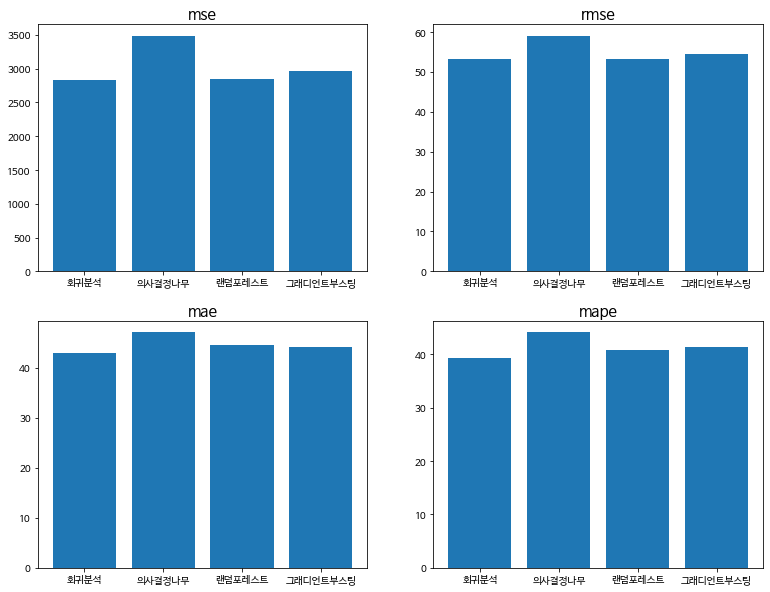

In [11]:
fig, ax = plt.subplots(2,2,figsize=(13,10))
ax[0,0].bar(models,mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models,rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models,mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models,mape)
ax[1,1].set_title("mape").set_fontsize(15)